In [1]:
# KNN : 구현쉽다, 이해가 쉽다, 하이퍼퍼러미터가 적다, 시간이 오래걸림, 메모리 많이 사용
# DT : 학습,예측 속도가 빠름, 오버피팅이 되기 쉽다, 하이퍼퍼러미터가 많다
# 랜덤포레스트 : DT의 단점을 보완, 하이퍼퍼러미터가 많다. 정확도가 대체적으로 높다
# SVM : 데이터가 적어도 정확도가 높은 편, 속도가 빠름, 고차원 데이터 처리가 용이
# 오버피팅이 되기 쉽다, 분류결과를 이해하기가 좀 어렵다
# 나이브베이즈 : 고차원 데이터가 다루기 용이, 구현이 쉽다, 예측, 학습속도가 빠름
# 선형회귀 : 예측값(수치)을 구할 수 있다, 데이터의 특징들이 선형관계에 있다고 가정
# 로지스틱회귀 : 분류(선형회귀 결과는 모든 실수 -> sigmoid함수 -> 0~1사이로 스케일링 -> 0.5기준)
#     z=wx+b (z가 +무한대 -> sigmoid -> 1, z가 -무한대 -> sigmoid -> 0)
#     sigmoid = 1/(1+e^-z)
# Kmeans : 군집화, 비교사학습, kmeans, h-clustering, DBSCAN
# PCA : 비교사학습, 주성분분석, 고차원 -> 저차원 차원 축소
# 신경망 : 인공신경망(ANN, 입력계층(외부 자극) -> 히든계층(뉴런, 처리) -> 출력계층(결과))
#          깊은 신경망(딥러닝, DNN) 입력계층(외부 자극) -> 히든계층1...히든계층N -> 출력계층(결과))
# 딥러닝의 종류 : CNN, RNN, RCNN,... 
    
# 전이학습(transfer learning):기존에 학습된 모델을 재사용, 
# 강화학습(reinforcement learning): 알파고 제로(바둑 규칙만 알고 있음, 0 -> 강화학습)
#     알파고(기보 데이터 학습(교사학습) -> 모델)
    
# 메타학습(meta learning)   : 고양이사진1장 -> 동물 중에서 고양이 분류 = 1way 1shot
# 고양이사진, 호랑이 1장씩 -> 동물 중에서 호랑이, 고양이 분류 = 2way 1shot   
# 고양이, 호랑이, 사자 2장씩 -> 동물 중에서 호랑이, 고양이, 사자 분류 = 3way 2shot   
# 퓨샷러닝(원샷러닝(현재 연구중), 제로샷러닝(미래))    
    
# 머신러닝 : 교사, 비교사, 강화학습    
    

In [2]:
import pandas as pd

In [5]:
df=pd.read_csv("data/csv/basketball_stat.csv")

In [6]:
df
#농구 선수의 경기 기록 -> 포지션(Pos)을 예측

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [8]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#스틸, 2점슛 데이터 시각화

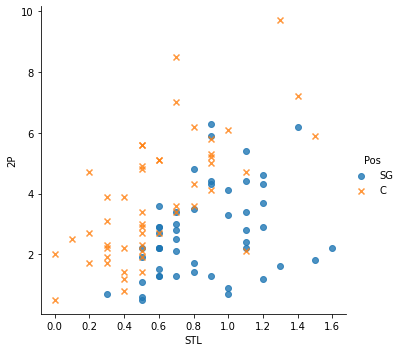

In [16]:
sns.lmplot('STL','2P',data=df, hue='Pos', markers=['o','x'], fit_reg=False)

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


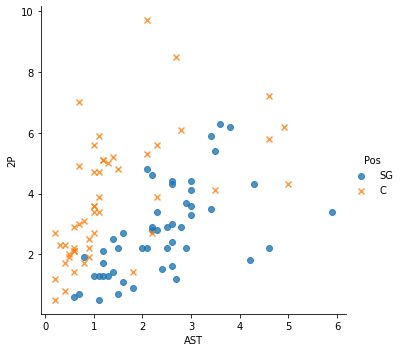

In [17]:
sns.lmplot('AST','2P',data=df, hue='Pos', markers=['o','x'], fit_reg=False)

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


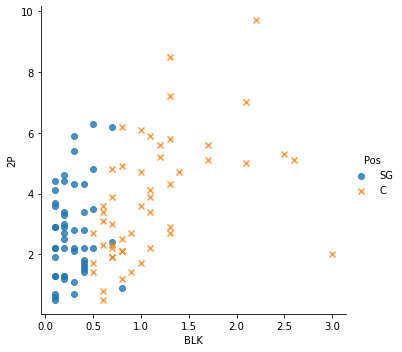

In [18]:
sns.lmplot('BLK','2P',data=df, hue='Pos', markers=['o','x'], fit_reg=False)

C:\Users\TECH5-29\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


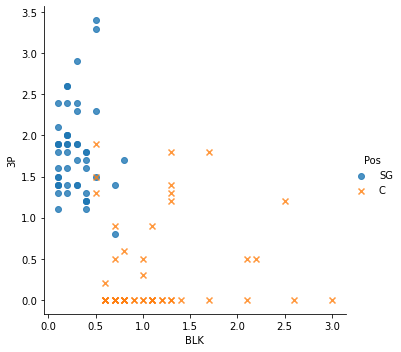

In [19]:
sns.lmplot('BLK','3P',data=df, hue='Pos', markers=['o','x'], fit_reg=False)

In [20]:
#포지션을 예측하는데 있어서 분별력이 떨어지는 특징들 제거
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [21]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [22]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [23]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#8:트레인, 2:테스트
train, test=train_test_split(df, test_size=0.2)

In [26]:
train.shape

(80, 5)

In [27]:
test.shape

(20, 5)

In [28]:
#전처리된 데이터 파일로 저장(피클)
import pickle

In [29]:
with open("basketball_train.pkl", 'wb') as train_data:
    pickle.dump(train,train_data)

In [30]:
with open("basketball_test.pkl", 'wb') as test_data:
    pickle.dump(test,test_data)

In [31]:
#저장되어 있는 데이터파일을 로드하여 모델링

In [32]:
with open("basketball_train.pkl", 'rb') as train_data:
    train=pickle.load(train_data)

In [33]:
with open("basketball_test.pkl", 'rb') as test_data:
    test=pickle.load(test_data)

In [69]:
#최적의 k값 검색(교차검증)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [35]:
train.shape #k를 3~40까지 변경해 가면서 최적의 k값을 검색

(80, 5)

In [39]:
max_k_range=train.shape[0]//2 #40

In [40]:
klist=[]

In [41]:
for i in range(3, max_k_range, 2) :
    klist.append(i)

In [45]:
train.columns
xtrain=train[['3P', 'TRB', 'BLK']]
ytrain=train[['Pos']]

In [46]:
model=KNeighborsClassifier(n_neighbors=3)

In [48]:
cross_val_score(model, xtrain, ytrain.values.ravel(), cv=10, scoring='accuracy')

array([0.875, 0.75 , 0.75 , 0.875, 1.   , 0.875, 1.   , 1.   , 1.   ,
       1.   ])

In [49]:
#k를 3~49까지 변경해가면서 cross_val_score의 평균이 가장 큰 k를 찾자

In [50]:
cv_scores=[]
for k in klist:
    model=KNeighborsClassifier(n_neighbors=k)    
    scores=cross_val_score(model, xtrain, ytrain.values.ravel(), cv=10, 
                           scoring='accuracy')
    cv_scores.append(scores.mean())

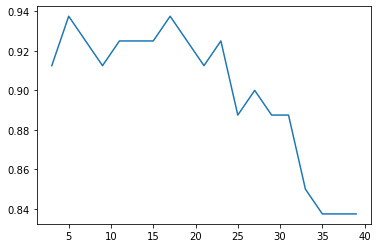

In [52]:
cv_scores 
plt.plot(klist, cv_scores) #5, 17일때 가장 높은 정확도

In [54]:
#k가 5또는 17일때 가장 정확도 높음 -> k가 17일때 knn 모델 예측

In [55]:
knn=KNeighborsClassifier(n_neighbors=17)

In [56]:
xtrain=train[['3P', 'TRB', 'BLK']]
ytrain=train[['Pos']]

In [58]:
knn.fit(xtrain, ytrain.values.ravel())

KNeighborsClassifier(n_neighbors=17)

In [62]:
xtest=test[['3P', 'TRB', 'BLK']]
ytest=test[['Pos']]

In [64]:
pred=knn.predict(xtest)
pred

array(['SG', 'SG', 'C', 'C', 'C', 'C', 'SG', 'SG', 'C', 'C', 'C', 'SG',
       'SG', 'C', 'SG', 'SG', 'C', 'C', 'C', 'C'], dtype=object)

In [67]:
ytest
res=pd.DataFrame({'prediction':pred, 'actual':ytest.values.ravel()})
res

,prediction,actual
0,SG,SG
1,SG,SG
2,C,C
3,C,C
4,C,SG
5,C,C
6,SG,SG
7,SG,SG
8,C,SG
9,C,C


In [70]:
accuracy_score(ytest.values.ravel(),pred) #0.85

0.85